In [1]:
# Create directory.
!mkdir -p ~/.kaggle

# Copy kaggle json to directory.
!cp kaggle.json ~/.kaggle/

In [2]:
import kagglehub
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
path = kagglehub.dataset_download("kushagratandon12/diabetic-retinopathy-balanced")
print("Path to dataset files:", path)
print(os.listdir(path))

# Define paths
dataset_dir = path  # Replace with your dataset directory
train_dir = '/content/train'
test_dir = '/content/test'
val_dir = '/content/val'

100%|██████████| 1.90G/1.90G [00:14<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kushagratandon12/diabetic-retinopathy-balanced/versions/1
['content']


In [4]:
train_dir = os.path.join(dataset_dir,'/content/train')
val_dir = os.path.join(dataset_dir,'/content/val')
test_dir = os.path.join(dataset_dir,'/content/test')

In [5]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

In [6]:
import os

# Define the dataset path
dataset_path = "/root/.cache/kagglehub/datasets/kushagratandon12/diabetic-retinopathy-balanced/versions/1/content/Diabetic_Balanced_Data"

# List all directories inside the dataset folder
directories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

print("Directories inside the dataset folder:", directories)


Directories inside the dataset folder: ['train', 'test', 'val']


In [7]:
# Define the dataset path
dataset_path = "/root/.cache/kagglehub/datasets/kushagratandon12/diabetic-retinopathy-balanced/versions/1/content/Diabetic_Balanced_Data/test"

# Check if 'content' exists and list its contents
if os.path.exists(dataset_path):
    items = os.listdir(dataset_path)
    print("Contents inside directory:", items)
else:
    print("'content' directory not found.")

Contents inside directory: ['1', '0', '2', '3', '4']


In [8]:
import os
import pandas as pd

# Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/kushagratandon12/diabetic-retinopathy-balanced/versions/1/content/Diabetic_Balanced_Data"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
val_path = os.path.join(dataset_path , "val")

# Function to load image paths and labels into a dataframe
def load_images_to_dataframe(directory):
    data = []
    valid_extensions = ('.jpg', '.jpeg', '.png')

    # Iterate over class folders (1 to 5)
    for label in sorted(os.listdir(directory)):
        class_folder = os.path.join(directory, label)

        if os.path.isdir(class_folder):  # Ensure it's a directory
            # Get all image paths with valid extensions
            image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(valid_extensions)]

            # Store image paths with labels
            for image in image_files:
                image_path = os.path.join(class_folder, image)
                data.append({"image_path": image_path, "label": int(label)})  # Convert label to int

    return pd.DataFrame(data)

# Load train and test datasets
train_df = load_images_to_dataframe(train_path)
test_df = load_images_to_dataframe(test_path)
val_df=load_images_to_dataframe(val_path)

# Display dataset info
print("Train DataFrame:")
print(train_df.head(), "\n")

print("Test DataFrame:")
print(test_df.head(), "\n")

print("Val DataFrame:")
print(val_df.head(), "\n")


# Check dataset sizes
print(f"Train dataset size: {train_df.shape}")
print(f"Test dataset size: {test_df.shape}")

print(f"val dataset size: {val_df.shape}")

Train DataFrame:
                                          image_path  label
0  /root/.cache/kagglehub/datasets/kushagratandon...      0
1  /root/.cache/kagglehub/datasets/kushagratandon...      0
2  /root/.cache/kagglehub/datasets/kushagratandon...      0
3  /root/.cache/kagglehub/datasets/kushagratandon...      0
4  /root/.cache/kagglehub/datasets/kushagratandon...      0 

Test DataFrame:
                                          image_path  label
0  /root/.cache/kagglehub/datasets/kushagratandon...      0
1  /root/.cache/kagglehub/datasets/kushagratandon...      0
2  /root/.cache/kagglehub/datasets/kushagratandon...      0
3  /root/.cache/kagglehub/datasets/kushagratandon...      0
4  /root/.cache/kagglehub/datasets/kushagratandon...      0 

Val DataFrame:
                                          image_path  label
0  /root/.cache/kagglehub/datasets/kushagratandon...      0
1  /root/.cache/kagglehub/datasets/kushagratandon...      0
2  /root/.cache/kagglehub/datasets/kushagratando

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot label distribution
def plot_label_distribution(df, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df["label"], palette="viridis")
    plt.title(f"Label Distribution in {title} Dataset")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()

<ipython-input-9-8d2a8425c033>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="viridis")


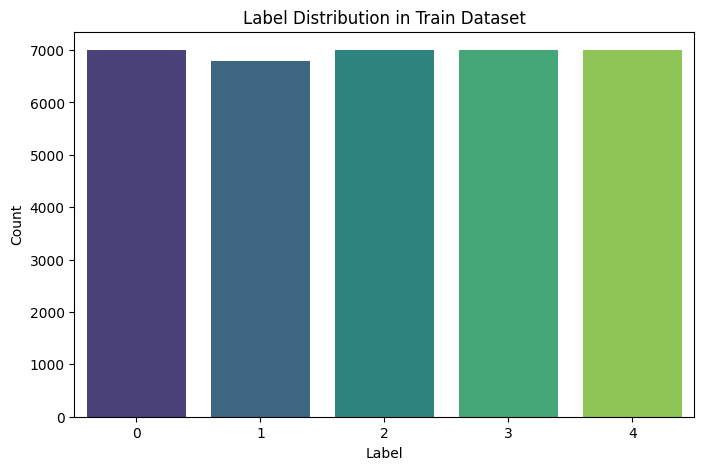

In [10]:

# Plot for train dataset
plot_label_distribution(train_df, "Train")

<ipython-input-9-8d2a8425c033>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="viridis")


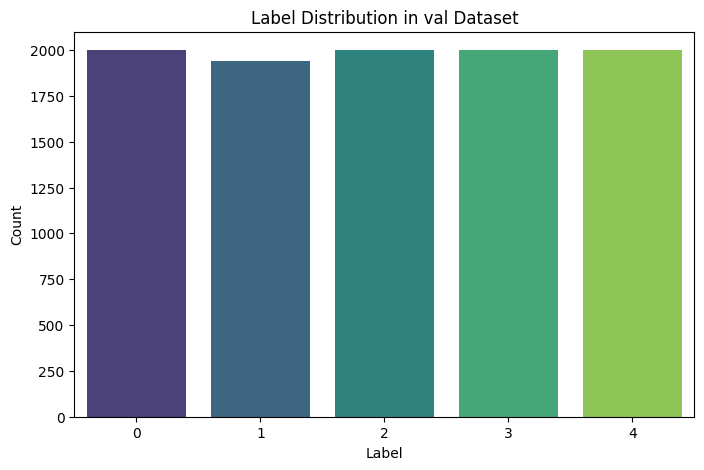

In [11]:

# Plot for train dataset
plot_label_distribution(val_df, "val")

In [12]:
label_mapping = {0: 'No_Dr', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferative DR'}

# Map labels to actual names and add a new column
train_df["actual_label"] = train_df["label"].map(label_mapping)
test_df["actual_label"] = test_df["label"].map(label_mapping)
val_df["actual_label"] = val_df["label"].map(label_mapping)

# Display the first few rows
print("Train DataFrame with actual labels:")
print(train_df.head(), "\n")

print("Test DataFrame with actual labels:")
print(test_df.head(), "\n")

print("Validation dataframe wuth actual labels:")
print("val_df.head(),\n")


Train DataFrame with actual labels:
                                          image_path  label actual_label
0  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr
1  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr
2  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr
3  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr
4  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr 

Test DataFrame with actual labels:
                                          image_path  label actual_label
0  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr
1  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr
2  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr
3  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr
4  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr 

Validation dataframe wuth actual labels:
val_df.h

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define batch size
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Create an ImageDataGenerator for real-time loading and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize images
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1  # 10% for validation
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

# Load training data in batches
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image_path",  # Use file path for images
    y_col="actual_label",  # Use class name for labels
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Load validation data in batches
val_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image_path",
    y_col="actual_label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Load test data in batches
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col="image_path",
    y_col="actual_label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # Don't shuffle test data
)


Found 31313 validated image filenames belonging to 5 classes.
Found 3479 validated image filenames belonging to 5 classes.
Found 4971 validated image filenames belonging to 5 classes.


In [15]:

import os
import numpy as np
import pandas as pd
import cv2  # OpenCV for image loading

# Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/kushagratandon12/diabetic-retinopathy-balanced/versions/1/content/Diabetic_Balanced_Data"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
val_path = os.path.join(dataset_path , "val")

# Label mapping
label_mapping = {0: 'No_Dr', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferative DR'}

# Function to load images, paths, and labels into a DataFrame
def load_images_to_dataframe(directory, img_size=(224, 224)):  # Resize all images to 224x224
    data = []
    valid_extensions = ('.jpg', '.jpeg', '.png')

    for label in sorted(os.listdir(directory)):
        class_folder = os.path.join(directory, label)

        if os.path.isdir(class_folder):
            image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(valid_extensions)]

            for image in image_files:
                image_path = os.path.join(class_folder, image)

                # Load image as NumPy array
                img = cv2.imread(image_path)  # Read image (BGR format)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                    img = cv2.resize(img, img_size)  # Resize image
                    img_array = np.array(img)  # Convert to NumPy array
                else:
                    continue  # Skip if the image is unreadable

                data.append({"image_path": image_path, "label": int(label), "actual_label": label_mapping[int(label)], "image_array": img_array})

    return pd.DataFrame(data)

# Load train and test datasets
train_df = load_images_to_dataframe(train_path)
test_df = load_images_to_dataframe(test_path)
val_df=load_images_to_dataframe(val_path)

# Display dataset info
print("Train DataFrame:")
print(train_df.head(), "\n")

print("Test DataFrame:")
print(test_df.head(), "\n")

# Check dataset sizes
print(f"Train dataset size: {train_df.shape}")
print(f"Test dataset size: {test_df.shape}")
print(f"val dataset size: {val_df.shape}")

# Verify image array shape
print("Example Image Shape (Train):", train_df.iloc[0]["image_array"].shape)


Train DataFrame:
                                          image_path  label actual_label  \
0  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr   
1  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr   
2  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr   
3  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr   
4  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr   

                                         image_array  
0  [[[128, 128, 128], [128, 128, 128], [128, 128,...  
1  [[[128, 128, 128], [128, 128, 128], [128, 128,...  
2  [[[128, 128, 128], [128, 128, 128], [128, 128,...  
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   

Test DataFrame:
                                          image_path  label actual_label  \
0  /root/.cache/kagglehub/datasets/kushagratandon...      0        No_Dr   
1  /root/.cache/kagglehub/

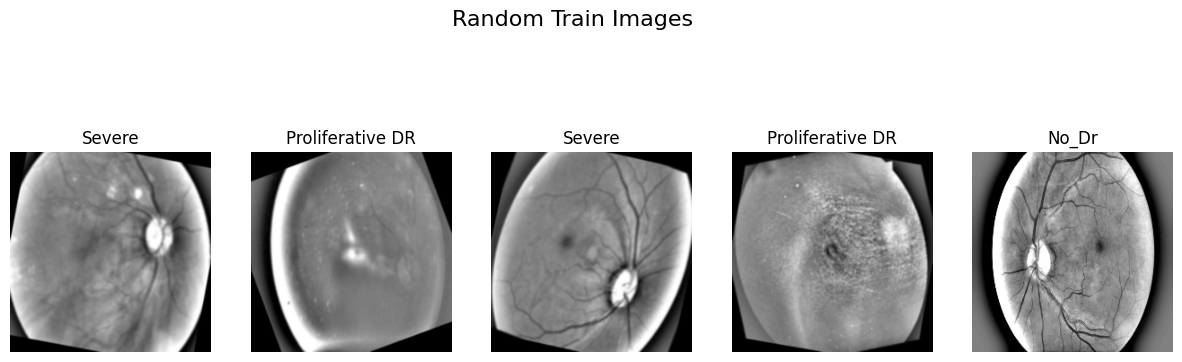

In [16]:
import matplotlib.pyplot as plt
import random

# Function to display random images with labels
def display_random_images(df, title="Sample Images"):
    random_samples = df.sample(5)  # Select 5 random rows

    plt.figure(figsize=(15, 5))
    for i, row in enumerate(random_samples.itertuples(), 1):
        img = row.image_array  # Get the image array
        label = row.actual_label  # Get the actual label

        plt.subplot(1, 5, i)
        plt.imshow(img)
        plt.title(label)
        plt.axis("off")  # Hide axes

    plt.suptitle(title, fontsize=16)
    plt.show()

# Display random images from train dataset
display_random_images(train_df, "Random Train Images")


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define batch size
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Create an ImageDataGenerator for real-time loading and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize images
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1  # 10% for validation
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

# Load training data in batches
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image_path",  # Use file path for images
    y_col="actual_label",  # Use class name for labels
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Load validation data in batches
val_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image_path",
    y_col="actual_label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Load test data in batches
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col="image_path",
    y_col="actual_label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False  # Don't shuffle test data
)


Found 31313 validated image filenames belonging to 5 classes.
Found 3479 validated image filenames belonging to 5 classes.
Found 4971 validated image filenames belonging to 5 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(224, 224, 3)), # Changed input_shape to (224, 224, 3)
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc')
#     f1_score,
]

In [20]:
model.compile(
    optimizer='Adam',
    loss="categorical_crossentropy",
     metrics=METRICS
)

In [21]:
history=model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs=20,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6883 - auc: 0.5185 - loss: 83.9098 - precision: 0.2147 - recall: 0.2115 - val_accuracy: 0.6000 - val_auc: 0.2930 - val_loss: 25.4856 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 475ms/step - accuracy: 0.7031 - auc: 0.5382 - loss: 41.3426 - precision: 0.2578 - recall: 0.2578 - val_accuracy: 0.6000 - val_auc: 0.3711 - val_loss: 23.1311 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 619ms/step - accuracy: 0.6815 - auc: 0.5115 - loss: 30.6904 - precision: 0.2038 - recall: 0.2038 - val_accuracy: 0.6000 - val_auc: 0.2539 - val_loss: 12.4380 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 520ms/step - accuracy: 0.7013 - auc: 0.5358 - loss: 17.7767 - precision: 0.2514 - recall: 0.2496 - val_accuracy: 0.6000 - val_auc: 0.3281 - val_loss: 28.0244 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Ep

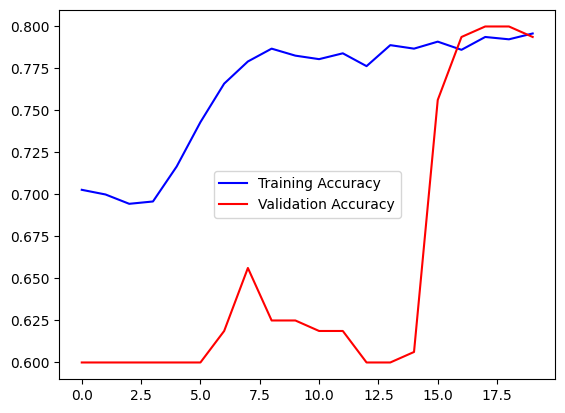

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

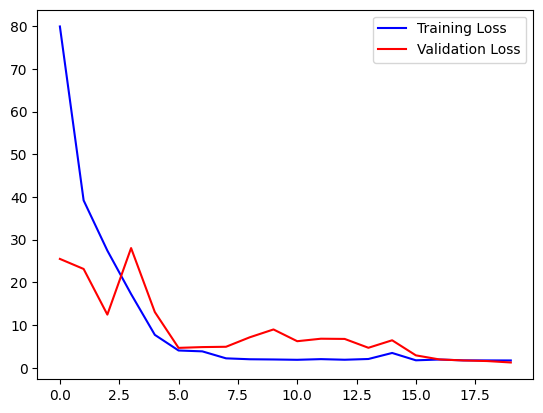

In [23]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.legend(loc = 'best')
plt.show()

In [24]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
predict_x = model.predict(test_generator)

156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
train_score = model.evaluate(train_generator, verbose= 1)
valid_score = model.evaluate(val_generator, verbose= 1)
test_score = model.evaluate(test_generator, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


979/979 ━━━━━━━━━━━━━━━━━━━━ 404s 413ms/step - accuracy: 0.7993 - auc: 0.4961 - loss: 1.7203 - precision: 0.1727 - recall: 9.7429e-04
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 447ms/step - accuracy: 0.8000 - auc: 0.8042 - loss: 1.2819 - precision: 0.4884 - recall: 0.0051
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.7974 - auc: 0.6404 - loss: 1.5336 - precision: 0.1074 - recall: 0.0018
Train Loss:  1.7169848680496216
Train Accuracy:  0.7991713285446167
--------------------
Validation Loss:  1.283920168876648
Validation Accuracy:  0.7999429106712341
--------------------
Test Loss:  1.6919437646865845
Test Accuracy:  0.7975863814353943


In [27]:


model.save("diabetic_retinopathy_model.h5")